# IRRADIANCIA RESUELTA ESPECTRALMENTE

In [11]:
from pvlib import spectrum, solarposition, irradiance, atmosphere
import pandas as pd
import matplotlib.pyplot as plt

Se presentan todas las caracteristicas necesarias para concoer la irradiancia espectral

In [40]:
caracteristics={
    'lat':40.544,
    'lon':-3.613,
    'tz':'Europe/Madrid',
    'date':'2021-12-21 8:30',
    'pressure':94800,
    'water_vapor_content':0.5,
    'tau500':0.1,
    'ozone':0.31,
    'albedo':0.2,
    }
caracteristics_module={    
    'tilt':20,
    'surface_azimuth':180,
    'radius':0.6,
    'area':179*10**-6
    }


In [41]:
times = pd.date_range(caracteristics['date'], freq='60min', periods=12,tz=caracteristics['tz'])
solpos = solarposition.get_solarposition(times, caracteristics['lat'], caracteristics['lon'])
aoi = irradiance.aoi(caracteristics_module['tilt'], caracteristics_module['surface_azimuth'], solpos.apparent_zenith, solpos.azimuth)
relative_airmass = atmosphere.get_relative_airmass(solpos.apparent_zenith,model='kasten1966')

In [42]:
spectra = spectrum.spectrl2(
    apparent_zenith=solpos.apparent_zenith,
    aoi=aoi,
    surface_tilt=caracteristics_module['tilt'],
    ground_albedo=caracteristics['albedo'],
    surface_pressure=caracteristics['pressure'],
    relative_airmass=relative_airmass,
    precipitable_water=caracteristics['water_vapor_content'],
    ozone=caracteristics['ozone'],
    aerosol_turbidity_500nm=caracteristics['tau500'],
)

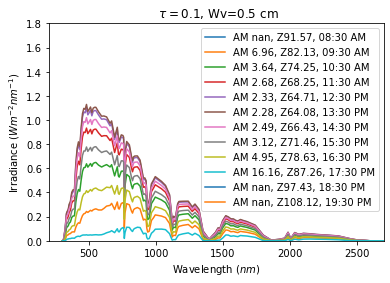

In [43]:
plt.figure()
plt.plot(spectra['wavelength'], spectra['poa_global'])
plt.xlim(200, 2700)
plt.ylim(0, 1.8)
plt.title(r" $\tau=0.1$, Wv=0.5 cm")
plt.ylabel(r"Irradiance ($W m^{-2} nm^{-1}$)")
plt.xlabel(r"Wavelength ($nm$)")

time_labels = times.strftime("%H:%M %p")
labels = [
    "AM {:0.02f}, Z{:0.02f}, {}".format(*vals)
    for vals in zip(relative_airmass, solpos.apparent_zenith, time_labels)
]
plt.legend(labels)
plt.show()